<a href="https://colab.research.google.com/github/chris051091/Tesis_Maestria/blob/main/windrose/src/Rosa_de_viento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install windrose

In [2]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import windrose
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_FIGURE = '/windrose/figure/'
NOMBRE_ESTACION = 'vizcaina'
FILE_WINDROSE = f'/tratados/{NOMBRE_ESTACION}_tratados_viento.csv'

PATH_FILE = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + FILE_WINDROSE
PATH_SAVE_FIGURE = PATH_DRIVE + PATH_FIGURE + NOMBRE_ESTACION + '/'

In [33]:
df = pd.read_csv(PATH_FILE, sep = ';')
df['MES'] = df['FECHA'].apply(lambda x: x[5:7])
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

In [35]:
def plot_windrose(df, title, path_to_save):
  ax = WindroseAxes.from_ax()

  ax.bar(df['DIRECVIENTO'], df['VELVIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 6), edgecolor='white', cmap=cm.cool)
  ax.legend(loc = 3, fontsize=15)
  #plt.rc('legend', fontsize=50)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'], fontsize=20)
  plt.title(title, fontsize=25)
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  #plt.ylabel(fontsize=20)
  #plt.xlabel(fontsize=20)
  plt.savefig(path_to_save)
  plt.show()

In [36]:
df.columns

Index(['FECHA', 'DIRECVIENTO', 'VELVIENTO', 'MES', 'HORA'], dtype='object')

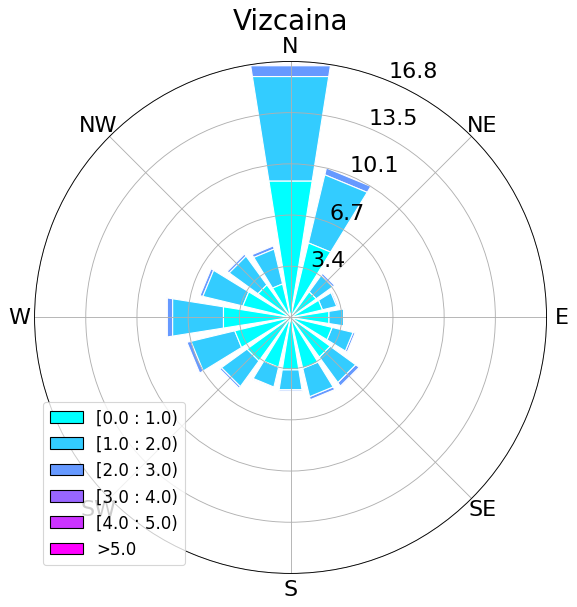

In [37]:
title = f'{NOMBRE_ESTACION.capitalize()}'
path_to_save = PATH_SAVE_FIGURE + f'windrose_datos_totales_{NOMBRE_ESTACION.lower()}.png'

plot_windrose(df, title, path_to_save)

# **Segmentación por hora**

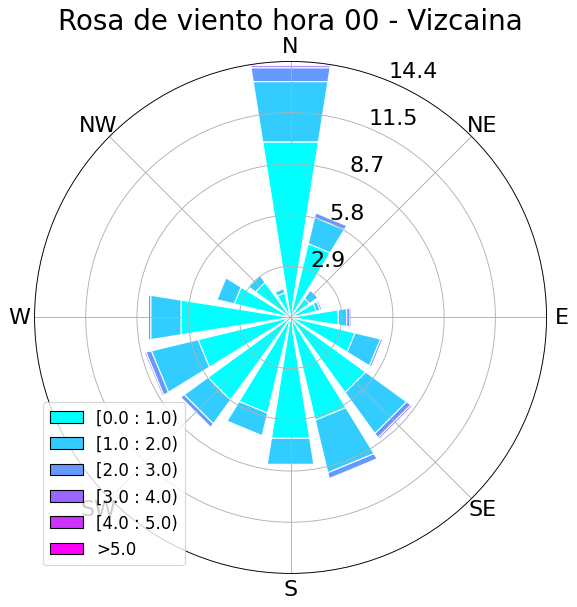

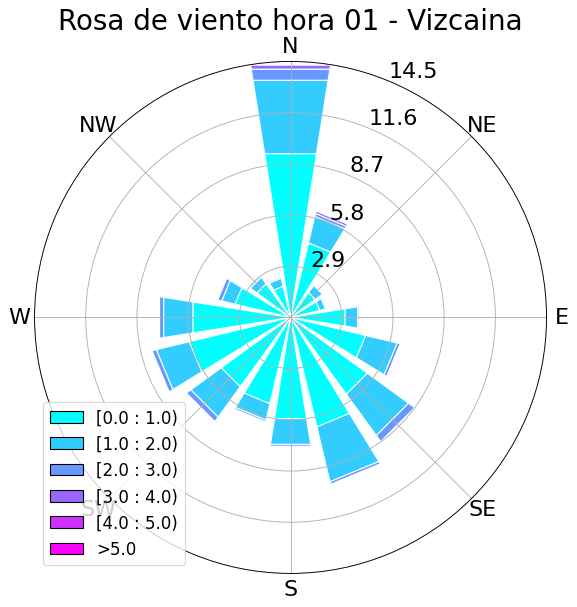

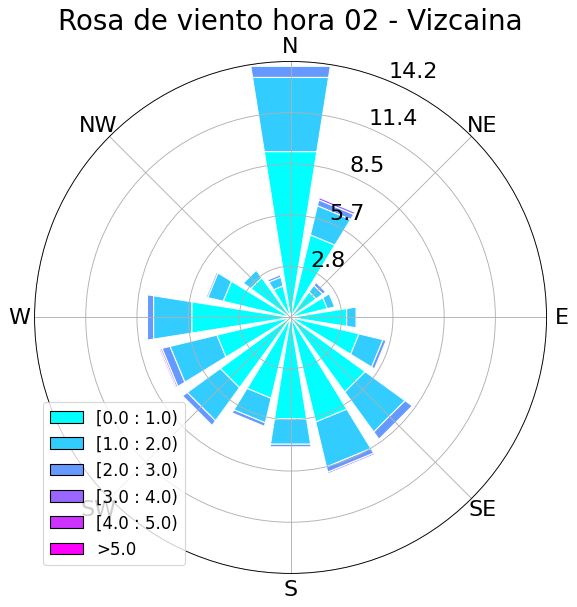

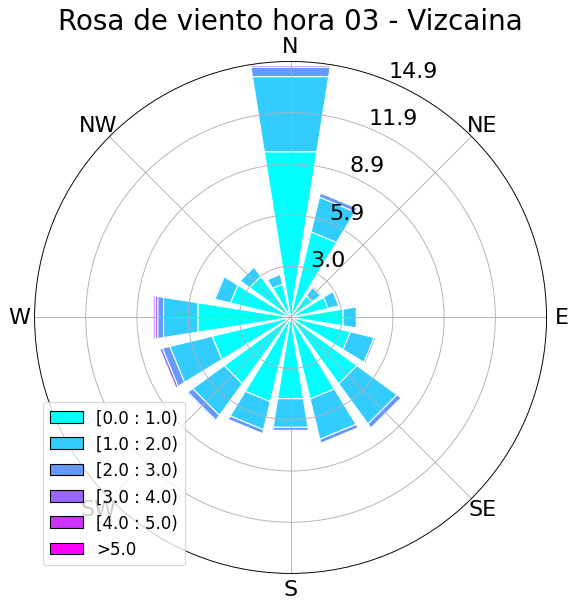

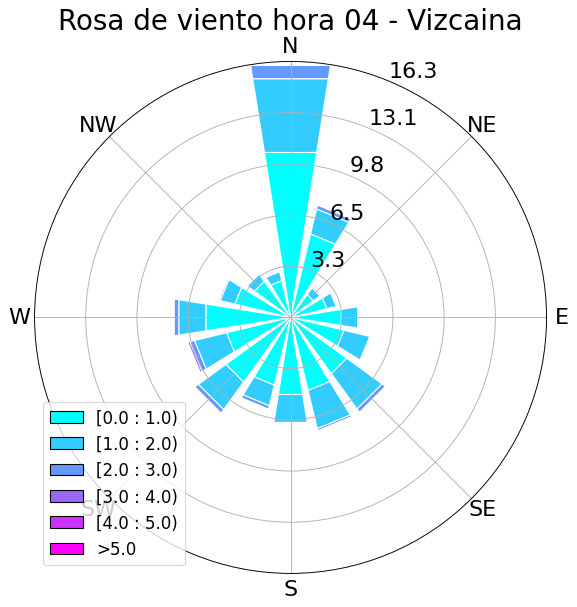

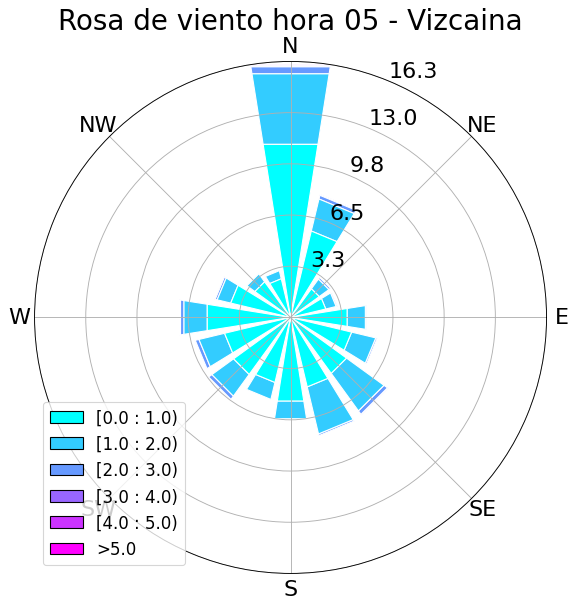

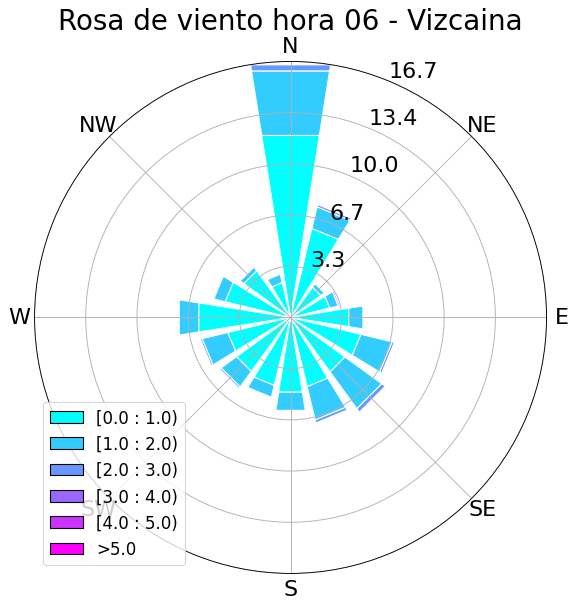

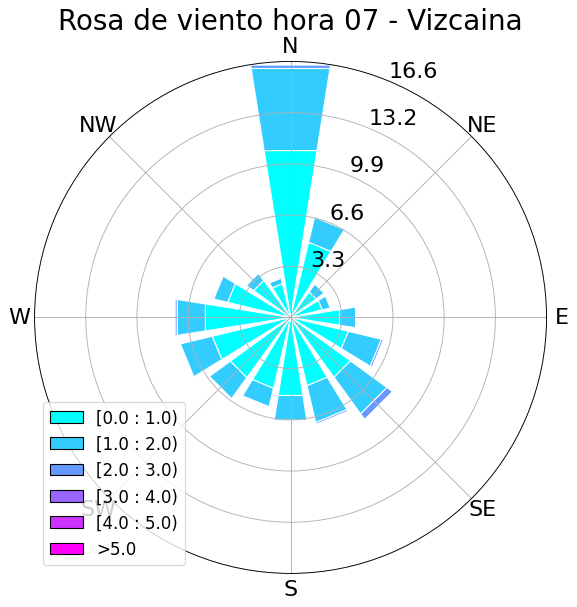

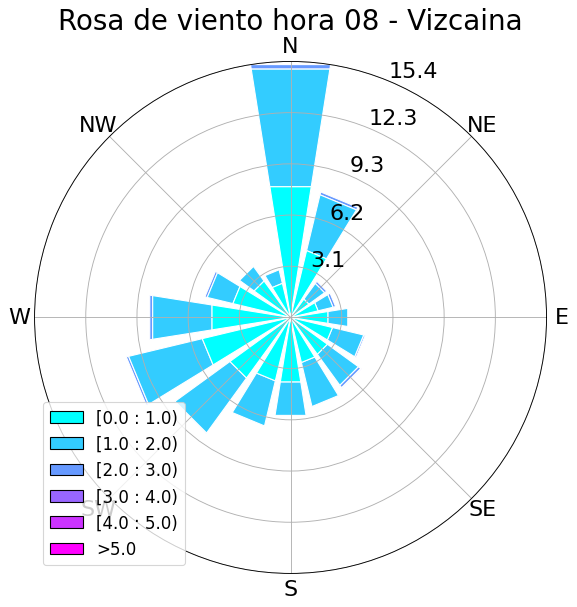

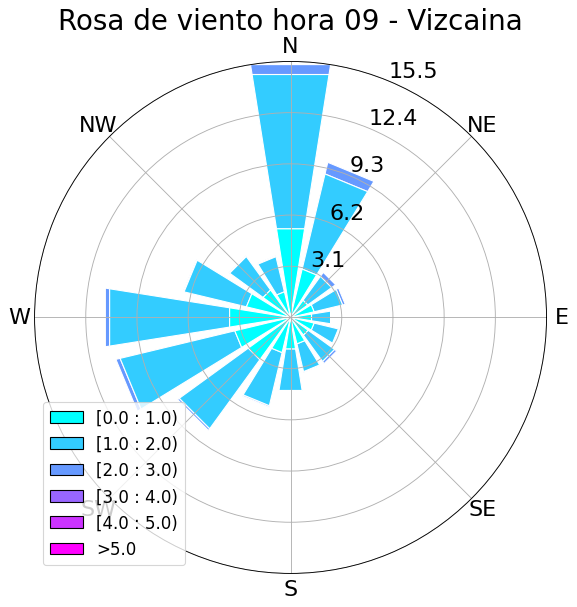

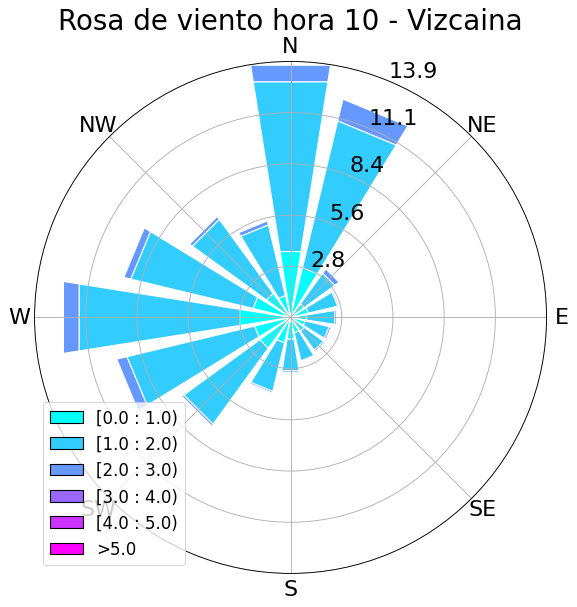

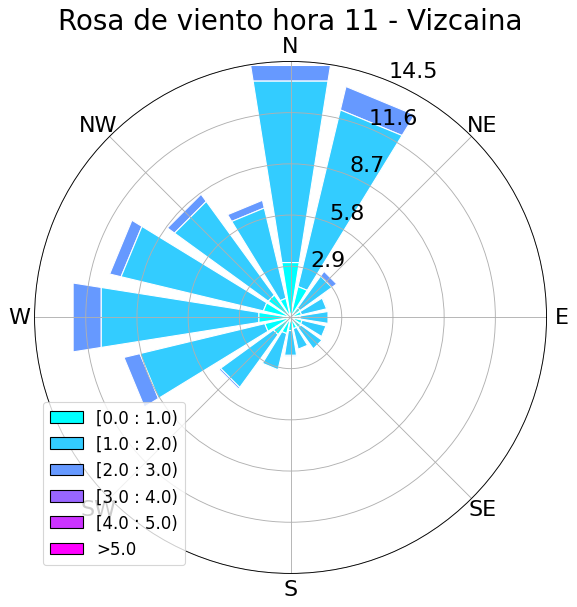

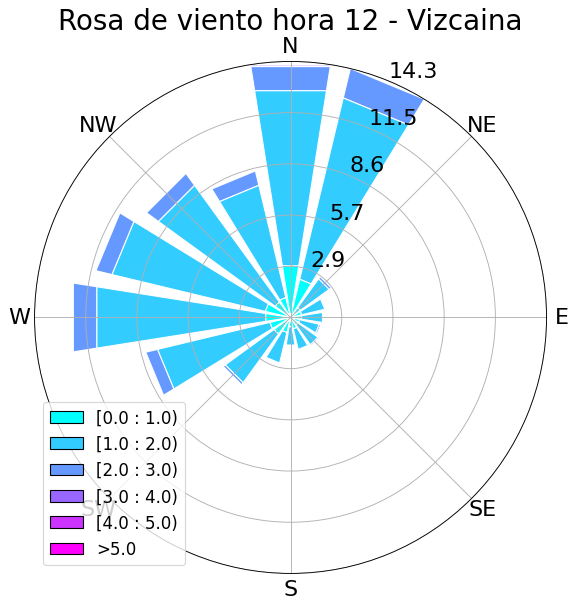

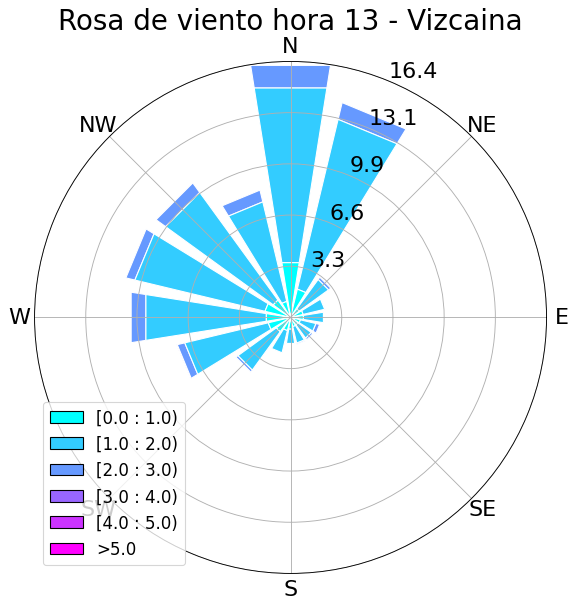

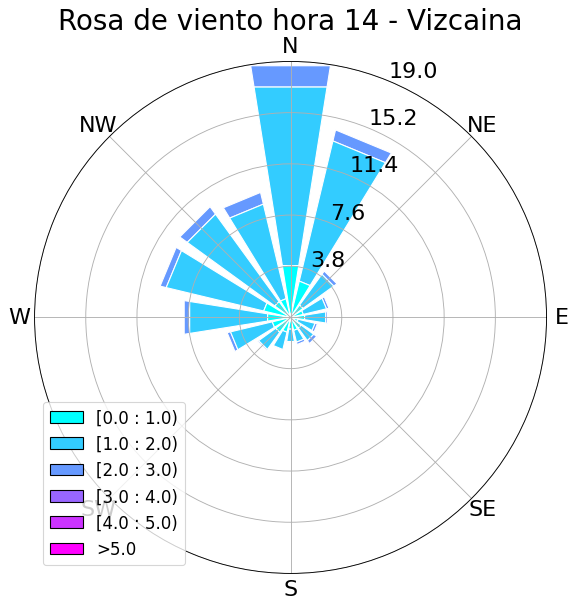

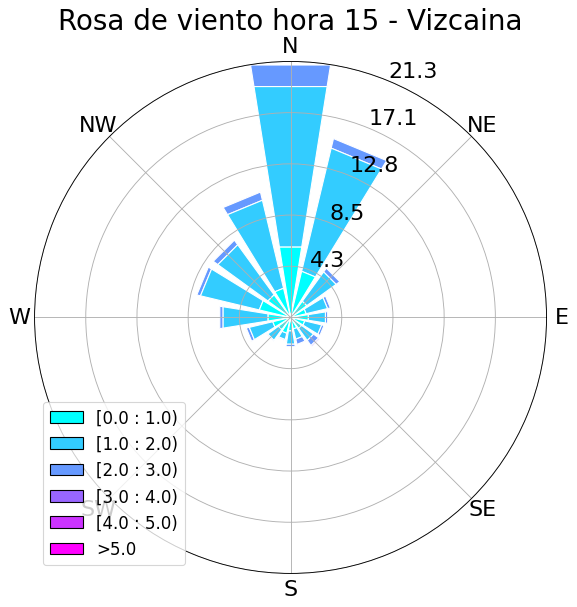

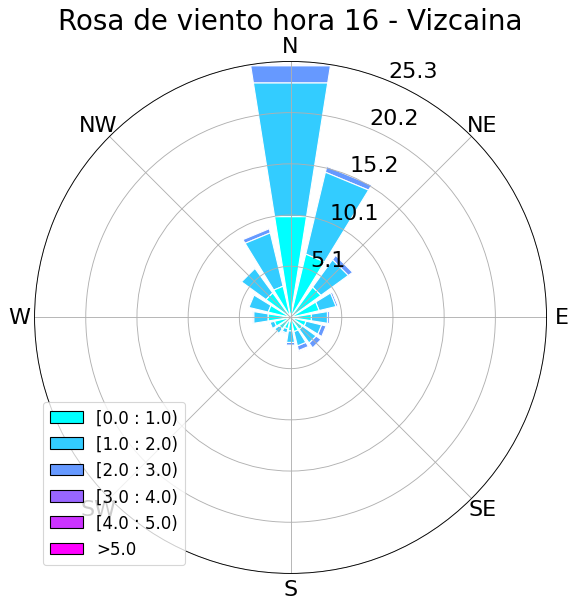

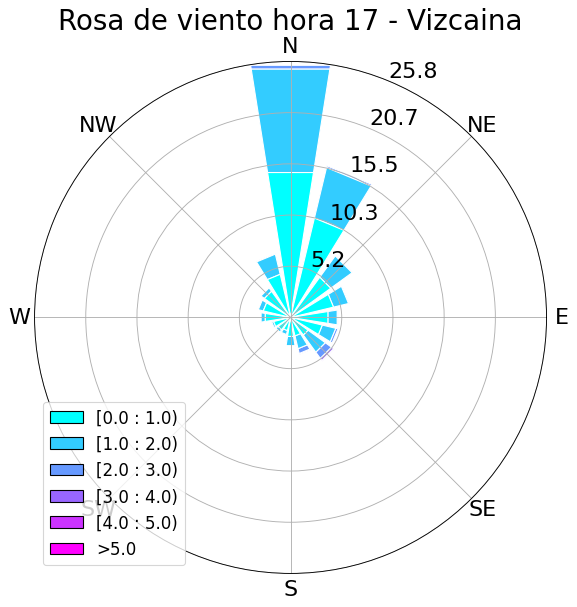

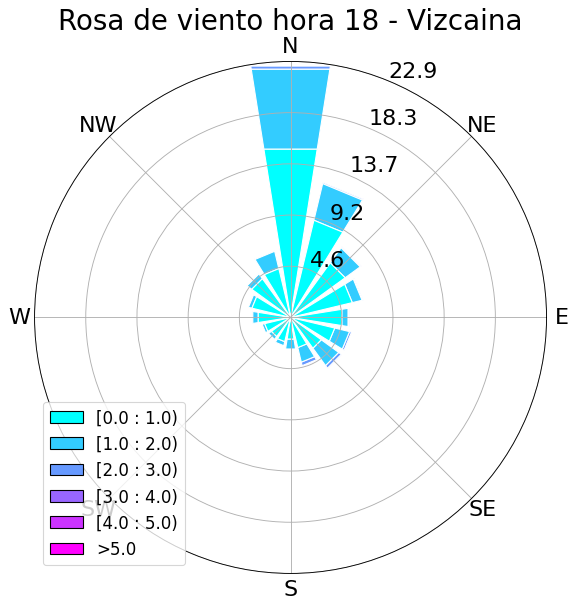

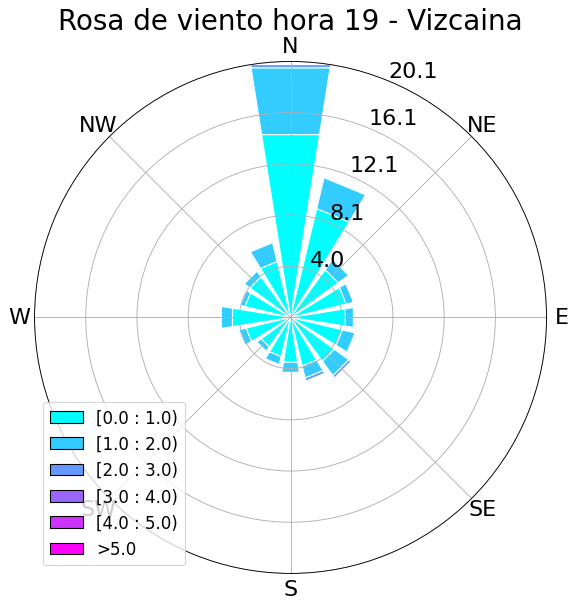

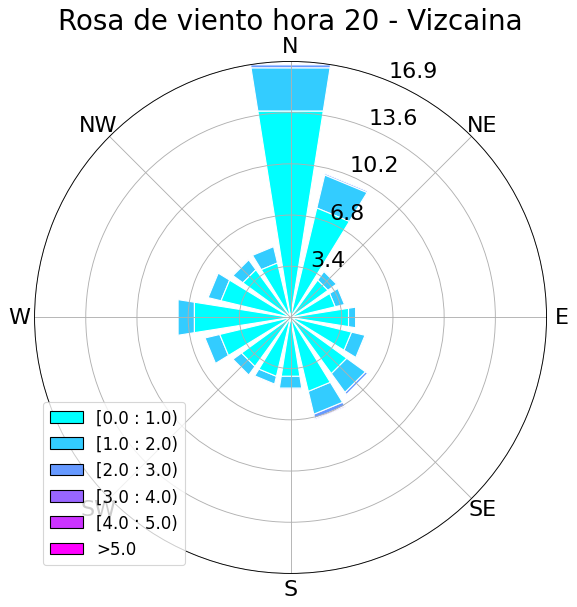

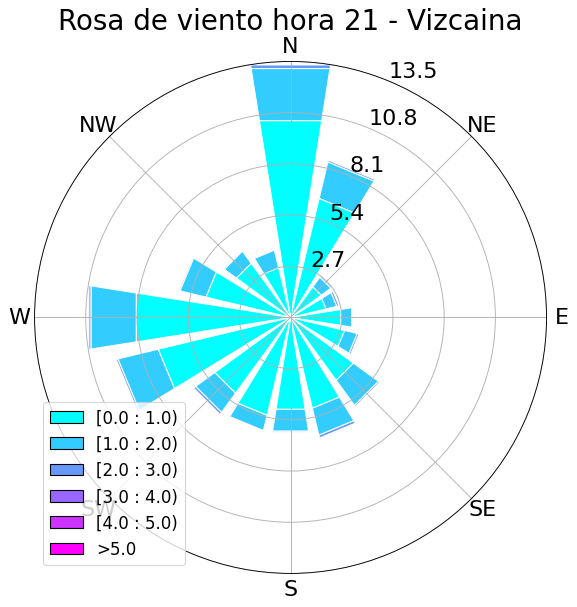

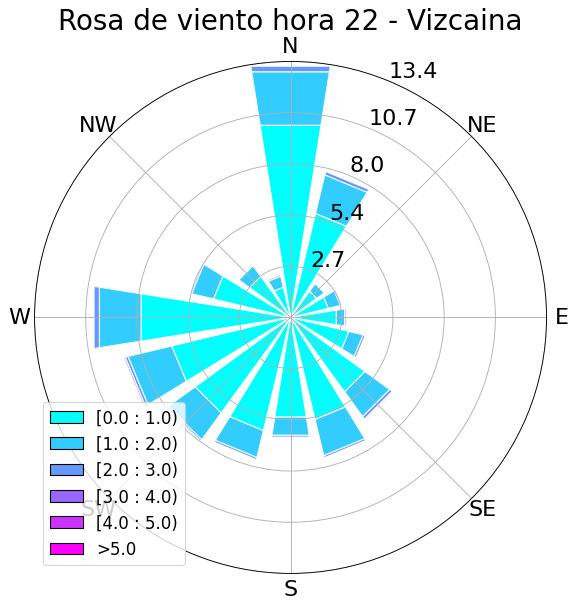

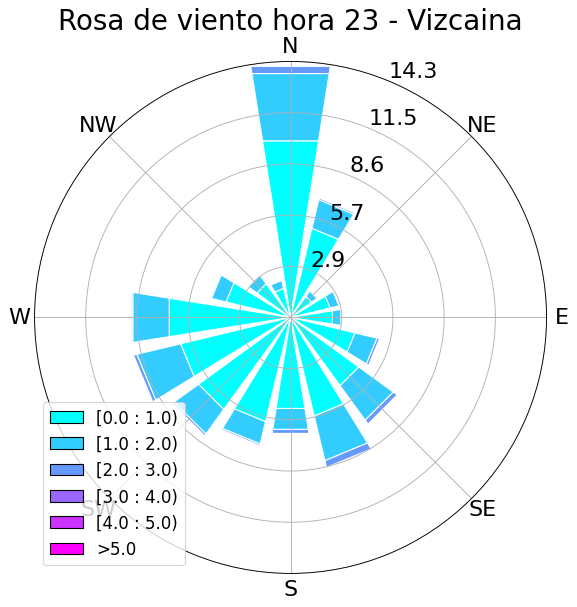

In [38]:
list_horas = [str(i).zfill(2) for i in range(24)]
for hora in list_horas:
 dft = df.loc[df['HORA'] == hora]
 title = f'Rosa de viento hora {hora} - {NOMBRE_ESTACION.capitalize()}'
 path_to_save = PATH_SAVE_FIGURE + f'windrose_hora_{hora}_{NOMBRE_ESTACION.lower()}.png'

 plot_windrose(dft, title, path_to_save)

In [39]:
list_horas.remove('19')

In [40]:
list_horas.sort()
primero = list_horas[0:7]
segundo = list_horas[19:23]

print(primero)
print(segundo)

['00', '01', '02', '03', '04', '05', '06']
['20', '21', '22', '23']


In [41]:
list_horas

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '20',
 '21',
 '22',
 '23']

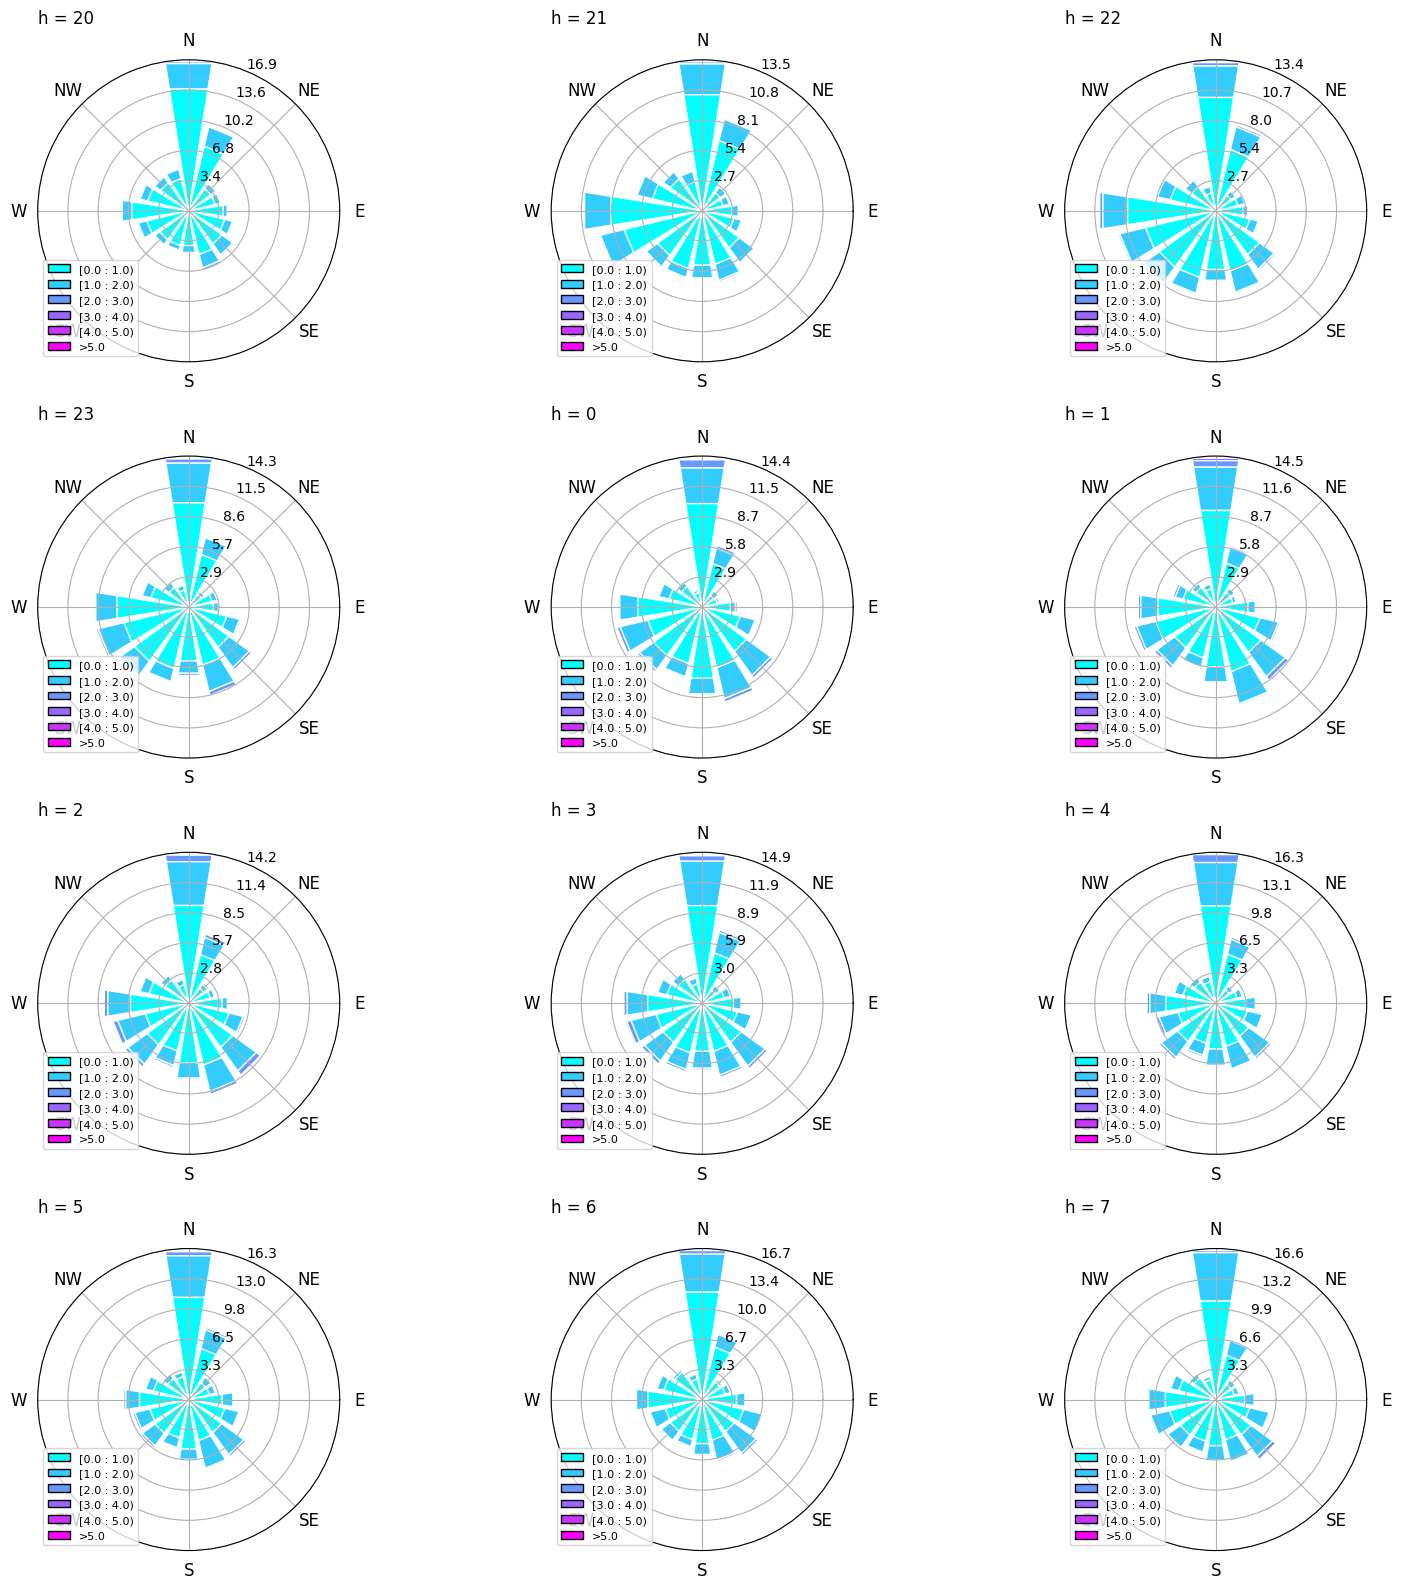

In [42]:
def plot_windrose_2(df, title, ax):
  ax.bar(df['DIRECVIENTO'], df['VELVIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 6), edgecolor='white', cmap=cm.cool)
  ax.legend(loc = 3, fontsize= 8)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'], fontsize= 12)
  ax.set_title(title, loc= "left")


fig, axs = plt.subplots(4, 3,figsize=(16,16),  subplot_kw=dict(projection="windrose"))
horas = list(list_horas[19:23]+list_horas[0:8])



for ax, hora in zip(axs.reshape(12), horas):
  dft = df.loc[df['HORA'] == hora]
  title = f'h = {int(hora)}'
  plot_windrose_2(dft, title, ax)

path_to_save = f'subplot_vientos_20h_7h_{NOMBRE_ESTACION}_horas.png'
plt.savefig(PATH_SAVE_FIGURE + path_to_save, format='png', bbox_inches = 'tight' )
plt.tight_layout()
plt.show()

# **Segmentación por mes**

In [ ]:
#list_mes = [str(i).zfill(2) for i in range(1, 13)]
#list_mes_str = ['Enero', 'Febrero', 'Marzo',
# 'Abril', 'Mayo', 'Junio',
# 'Julio', 'Agosto', 'Septiembre',
# 'Octubre', 'Noviembre', 'Diciembre']

#for mes, mes_str in zip(list_mes, list_mes_str):
#  dft = df.loc[df['MES'] == mes]
#  title = f'Rosa de viento {mes_str} - {NOMBRE_ESTACION.capitalize()}'
#  path_to_save = PATH_SAVE_FIGURE + f'mensual/{mes_str.capitalize()}/windrose_total_{mes_str.lower()}_{NOMBRE_ESTACION.lower()}.png'

#  plot_windrose(dft, title, path_to_save)

# **Segmentación por mes y hora**

In [ ]:
#for mes, mes_str in zip(list_mes, list_mes_str):
#  for hora in list_horas:
#    dft = df.loc[(df['MES'] == mes) & (df['HORA'] == hora)]
#    title = f'Rosa de viento {mes_str} - Hora {hora} - {NOMBRE_ESTACION.capitalize()}'
#    path_to_save = PATH_SAVE_FIGURE + f'mensual/{mes_str.capitalize()}/windrose_{mes_str.lower()}_hora_{hora}_{NOMBRE_ESTACION.lower()}.png'

#    plot_windrose(dft, title, path_to_save)

# **Segmentación por bloques de horas**

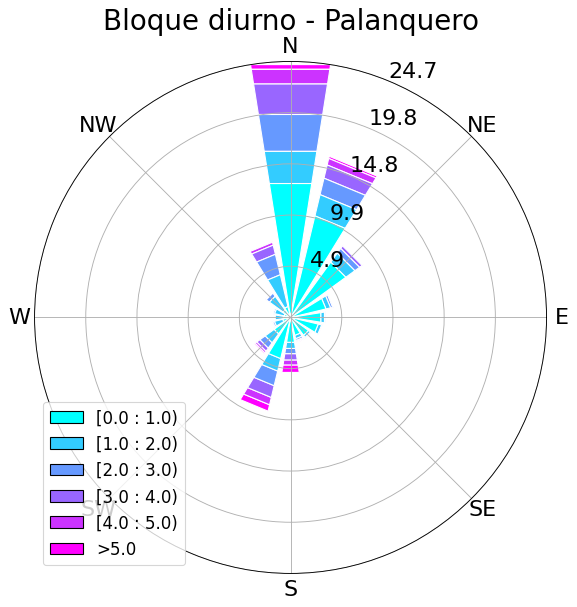

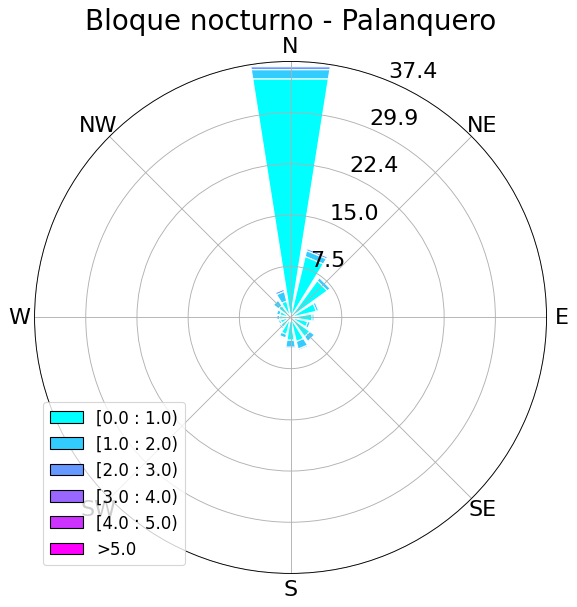

In [8]:
bloque_diurno = ['12', '13', '14', '15', '16', '17', '18', '19']
bloque_nocturno = ['20', '21', '22', '23', '00', '01', '02', '03', '04', '05']
bloques = [bloque_diurno, bloque_nocturno]

for bloque, horario in zip(bloques, ['diurno', 'nocturno']):

  dft = df.loc[df['HORA'].isin(bloque)]

  title = f'Bloque {horario} - {NOMBRE_ESTACION.capitalize()}'
  path_to_save = PATH_SAVE_FIGURE + f'bloque/{horario}/windrose_{horario}_{NOMBRE_ESTACION.lower()}.png'


  plot_windrose(dft, title, path_to_save)

# **Segmentación por bloques de horas y mes**

In [ ]:
#for mes, mes_str in zip(list_mes, list_mes_str):
#  for bloque, horario in zip(bloques, ['diurno', 'nocturno']):

#    dft = df.loc[(df['HORA'].isin(bloque)) & (df['MES'] == mes)]

#    title = f'Rosa de viento {mes_str.capitalize()} - Bloque {horario} - {NOMBRE_ESTACION.capitalize()}'
#    path_to_save = PATH_SAVE_FIGURE + f'bloque/{horario}/windrose_{mes_str.lower()}_{horario}_{NOMBRE_ESTACION.lower()}.png'

#    plot_windrose(dft, title, path_to_save)